<a href="https://colab.research.google.com/github/singh2jz/sales-predictions/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 3/Data/Updated_Sales_Predictions.csv')

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_List_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_List_Price            8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


In [123]:
total_sales = df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
avg_sales = df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].mean()

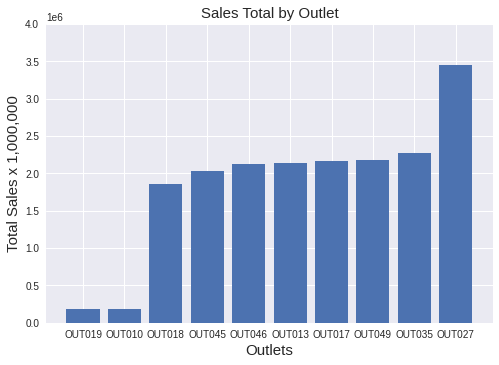

In [124]:
#Outlets's total revenue
total_sales = total_sales.sort_values('Item_Outlet_Sales')
plt.style.use('seaborn')
plt.bar(total_sales.index, total_sales['Item_Outlet_Sales']);
plt.xlabel('Outlets', fontsize = 15);
plt.ylabel('Total Sales x 1,000,000', fontsize = 15);
plt.title('Sales Total by Outlet', fontsize = 15);
plt.ylim(bottom=0,top=4000000);

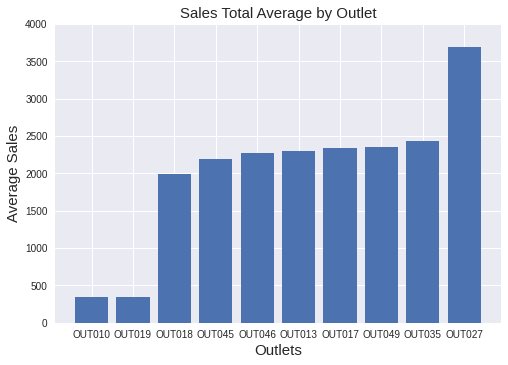

In [125]:
#seeing the avg revenue too
#comparing the total and avg
avg_sales = avg_sales.sort_values('Item_Outlet_Sales')
plt.style.use('seaborn')
plt.bar(avg_sales.index, avg_sales['Item_Outlet_Sales']);
plt.xlabel('Outlets', fontsize = 15);
plt.ylabel('Average Sales', fontsize = 15);
plt.title('Sales Total Average by Outlet', fontsize = 15);
plt.ylim(top=4000);

In [126]:
vis_total = df.groupby(['Item_Identifier'])[['Item_Visibility']].sum()

In [127]:
vis_top10 = vis_total.sort_values('Item_Visibility', ascending=False)

In [128]:
vis_top10 = vis_top10.head(10)

In [129]:
vis_sales = df.groupby(['Item_Identifier'])[['Item_Outlet_Sales', 'Item_Visibility']].sum()

In [130]:
vis_sales = vis_sales.sort_values('Item_Visibility')

In [131]:
vis_sales_top10 = vis_sales.head(10)

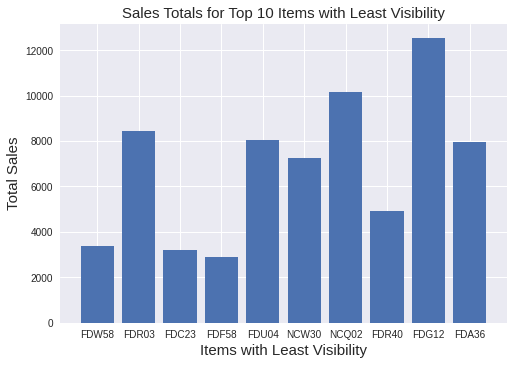

In [132]:
#Total sales for top 10 items with the least visibility
#Might add more because this info is good but need something to compare to.
plt.style.use('seaborn')
plt.bar(vis_sales_top10.index, vis_sales_top10['Item_Outlet_Sales']);
plt.xlabel('Items with Least Visibility', fontsize = 15);
plt.ylabel('Total Sales', fontsize = 15);
plt.title('Sales Totals for Top 10 Items with Least Visibility', fontsize = 15);

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_List_Price            8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [134]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_List_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [135]:
Outlet_ALP = df.groupby(['Outlet_Identifier'])[['Item_List_Price']].mean()

In [136]:
Outlet_ALP = Outlet_ALP.sort_values('Item_List_Price')

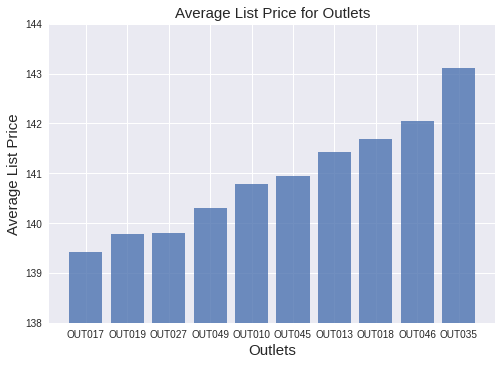

In [137]:
#shows outlets' average list price. Cheapest store to shop at to the most expensive
#skewed because of y limits but still figuring out what to do with this
plt.style.use('seaborn')
plt.bar(Outlet_ALP.index, Outlet_ALP['Item_List_Price'], alpha=.8);
plt.xlabel('Outlets', fontsize = 15);
plt.ylabel('Average List Price', fontsize = 15);
plt.title('Average List Price for Outlets', fontsize = 15);
plt.ylim(bottom=138, top=144);

In [138]:
#divide the item outlet sales by item list price to see how many they sold
#this might be somewhat flawed. might need to do sum of sales divided by mean of list price
numItems = df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales', 'Item_List_Price']].mean()

In [143]:
numItems

,Item_Outlet_Sales,Item_List_Price
Outlet_Identifier,,
OUT010,339.351662,140.777594
OUT013,2298.995256,141.425982
OUT017,2340.675263,139.421119
OUT018,1995.498739,141.678634
OUT019,340.329723,139.787088
OUT027,3694.038558,139.801791
OUT035,2438.841866,143.122481
OUT045,2192.384798,140.950246
OUT046,2277.844267,142.057387


In [147]:
avgItems = numItems['Item_Outlet_Sales'] / numItems['Item_List_Price']

<BarContainer object of 10 artists>

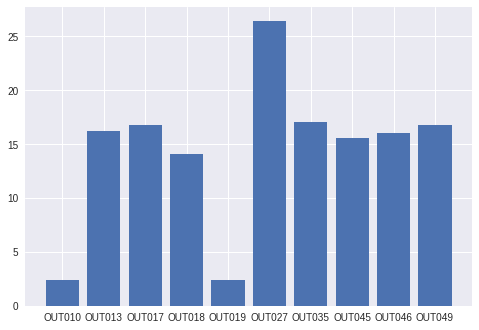

In [150]:
plt.bar(numItems.index, avgItems)